In [1]:

import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../dataset_generator/")
from environments import Environments

import umap
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("project_style.mplstyle")

import stats
import analysis_tools

In [2]:
def plot_3d_proj(data, tags = None, cmap = "viridis", title = "", axes = None):
    if axes is None:
        fig = plt.figure(figsize = (6,6))
        ax = fig.add_subplot(projection='3d')
    else:
        ax = axes
    ax.set_title(title)
    #norm = matplotlib.colors.Normalize(np.amin(tags), np.amax(tags))
    #col = matplotlib.cm.tab20c(norm(tags))
    ax.scatter(xs=data[:,0], ys=data[:,1], zs=data[:,2], c = tags, s =5, alpha = 0.5, cmap = cmap, edgecolors=None)
    ax.axis("off")
    
    if axes is None:
        return fig    

In [3]:
def fit_umap(data, components = 2):
    fit = umap.UMAP(n_components = components)
    transformed = fit.fit_transform(data)
    return transformed

In [4]:
model_name = f"../models/al1_10_l2_0"
path = f"../models/{model_name}"
model, params = analysis_tools.load_model(path, device = "cpu", model_type = "RNN")

In [5]:
env = Environments()
sequence = list(env.envs)
n_envs = len(sequence)
limits = 1.1*np.array([-1.5, 1.5, -1.5, 1.5])

timesteps = 10000

In [26]:
weights = model.g.weight_hh_l0.detach().cpu().numpy()

for i in range(len(weights)):
        weights[i, i] = np.nan

In [27]:
eps = 1e-3
nonzero = np.sum(np.abs(weights), axis = -1) > eps

In [28]:
nonzero.sum()

0

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

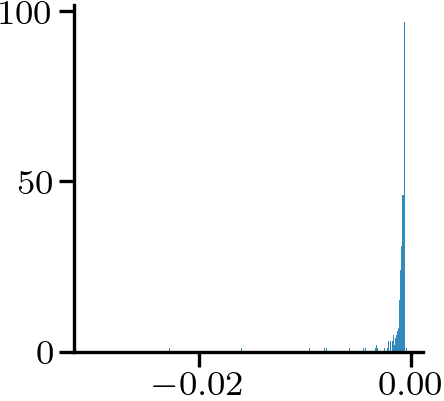

In [33]:
plt.figure()
plt.hist(weights[0], bins = 500)
